##  Relevant Concepts for Numerical optimization

#### David Rosado and Flàvia Ferrús 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 1. One dimensional case

Let's consider the function $f(x) = x^3- 2x +2$. We may study the extreme points of this function in order to optimize it, i.e. find the minimum and maximum points. 

#### 1.
Let's consider the function's plot within the range $x\in [-2,2]$ in order to have a more intuitive vision of the function.

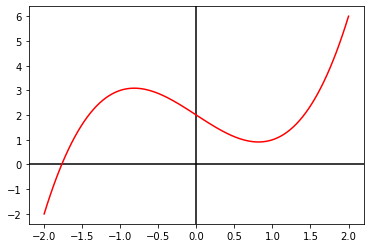

In [ ]:
#Plot of the function
def f(x):
    return x**3-2*x +2
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.axhline(y=0,color='k')
ax.axvline(x=0,color='k')
x=np.linspace(-2,2, 100)
plt.plot(x, f(x), 'r')

Note that within this range of values, the function attains a local minimum and maximum. Let's study these points with more detail.

#### 2.

The points that satisfy $f'(x)=0$ are given by the solutions of $3 x^2 -2 = 0 \iff x = \pm \sqrt{\frac{2}{3}}$. 

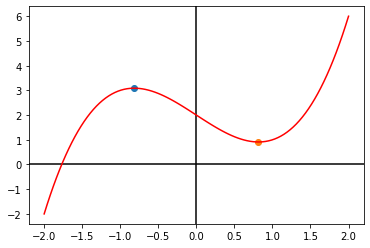

In [ ]:
# plot of the function with the points we found that satisfies f'(x)=0
x0= -np.sqrt(2/3)
x1=  np.sqrt(2/3)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.axhline(y=0,color='k')
ax.axvline(x=0,color='k')
plt.plot(x, f(x), 'r')
plt.scatter(x0, f(x0))
plt.scatter(x1, f(x1))

Here we can see that the analitical results obtained are congruent with the plot. The points we found that satisfies $f'(x)=0$ are marked in blue and orange color in the plot.

#### 3.

In order to check whether the points we found are a minimum or a maximum we may compute the 2nd order Taylor's expansion around each point, $x^*$, i.e.
$$
f(x^*+ h) \approx f(x^*) + h f'(x^*) + \frac{1}{2}h^2 f''(x^*)
$$
So in order for $x^*$ to be a minimum we want the second derivative of the function at that point to be positive, $f''(x^*) > 0$. Similarly, if $f''(x^*)<0$, we have a maximum. 

In [ ]:
# We compute the second derivative of the function in order to classify the critical points
def dif2(x):
    return 6*x

print(dif2(x0))
print(dif2(x1))

-4.898979485566356
4.898979485566356


Since $f''(x_1)>0$, then the point $\sqrt{\frac{2}{3}}$ is a minimum. Similarly, we have $f''(x_0)<0$, thus  $-\sqrt{\frac{2}{3}}$ is a maximum.

#### 4.

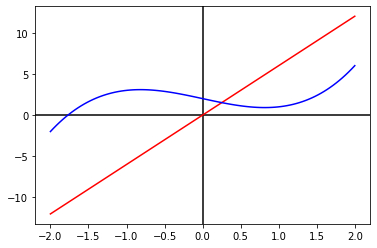

In [ ]:
#Plot od the function and its second derivative
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.axhline(y=0,color='k')
ax.axvline(x=0,color='k')
x=np.linspace(-2,2, 100)
plt.plot(x, dif2(x), 'r')
plt.plot(x, f(x), 'b')

As we can see, in the range of values where the second derivative is negative, including point $x =-\sqrt{\frac{2}{3}}$, the function is approximated with concave second order Taylor expansion. Similarly, in the points where the second derivative is positive, including point $x =\sqrt{\frac{2}{3}}$, the function is approximated with convex second order Taylor expansion.

### 2. Two dimensional case

#### 2.1 A simple two-dimensional function

#### 1.

Let's study now a simple two dimensional function, given by the quadratic expression 
$$
f(\mathbf{x})=x_1^2+ x_2^2, \quad \mathbf{x} \in \mathbb{R}^2
$$
Let's consider first the plot of the function.

In [ ]:
def f2(x,y):
    return x**2 + y**2

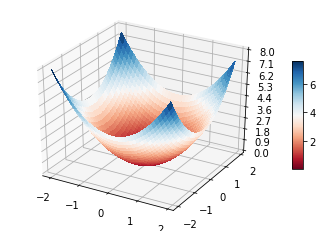

In [ ]:
#Plot of the function
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from matplotlib import cm
import pylab

x=np.arange(-2,2, 0.1)
y=np.arange(-2,2, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= f2(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

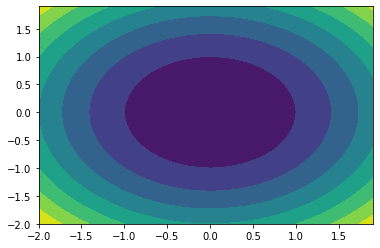

In [ ]:
#Plot of the level curves
x=np.arange(-2,2, 0.1)
y=np.arange(-2,2, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= f2(X,Y)

fig, ax = plt.subplots()
ax.contourf(X, Y, Z)

plt.show()

It is clear that we have a minimum in the point (0,0)

#### 2.

In [ ]:
#The gradient of the function
def grad(x,y):
    return np.array(2*x, 2*y)

The gradient of the function vanishes only at tho point (0,0). Note that this could be easily computed, since the gradient is given analitically by $\nabla f (\mathbf{x})= (2x_1, 2x_2) = (0,0) \iff (x_1, x_2)=(0,0)$.


#### 3.

Note that the Hessian matrix is given by 
\begin{pmatrix}
\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\ \frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2}
\end{pmatrix}
Computing the corresponding derivatives we get the Hessian 
\begin{pmatrix}
2 & 0 \\ 0 & 2
\end{pmatrix}
Note that for this specific matrix, the eigenvectors are given by $ (1,0), (0,1)$, since it is diagonalized, and trivially we can see that the eigenvalues are given by $2$ as an eigenvalue with multiplicity 2. Then, the eigenvalues of the Hessian are clearly positive for each $x \in \mathbb{R}^2$, and, in particular, at the critical point $(0,0)$ which is, in fact, a minimum. 

In [ ]:
#This function computes the eigenvalues and eigenvectors of the matrix
np.linalg.eig(np.matrix([[2,0], [0,2]]))

(array([2., 2.]), matrix([[1., 0.],
         [0., 1.]]))

#### 4. 

Let's consider now different functions in order to study the different behaviours of the critical points. Consider the functions
$$
f_A(\mathbf{x}) = -x_1^2 - x_2^2, \quad f_B(\mathbf{x}) = x_1^2 - x_2^2, \quad f_C(\mathbf{x}) = x_1^2 
$$

In [ ]:
def fA(x,y):
    return -x**2 - y**2

def fB(x,y):
    return x**2 - y**2

def fC(x,y):
    return x**2

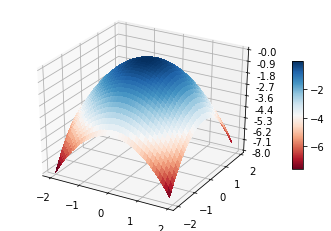

In [ ]:
#Plot of the function f_A
x=np.arange(-2,2, 0.1)
y=np.arange(-2,2, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= fA(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

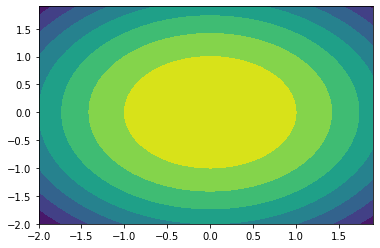

In [ ]:
#Contour plot:
x=np.arange(-2,2, 0.1)
y=np.arange(-2,2, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= fA(X,Y)

fig, ax = plt.subplots()
ax.contourf(X, Y, Z)

plt.show()

Here we just have gradient zero at the point (0,0), since $\nabla f_A(x,y)=(-2x,-2y)$. This point is in fact a maximum. The arguments to see this fact are the same as followed on the previous steps.
In fact, note that the Hessian is given by
\begin{pmatrix}
-2 & 0 \\ 0 & -2
\end{pmatrix}
 and trivially we can see that the eigenvalues are given by $-2$ as an eigenvalue with multiplicity 2 and therefore the point (0,0) is a maximum. 

In [ ]:
np.linalg.eig(np.matrix([[-2,0], [0,-2]]))

(array([-2., -2.]), matrix([[1., 0.],
         [0., 1.]]))

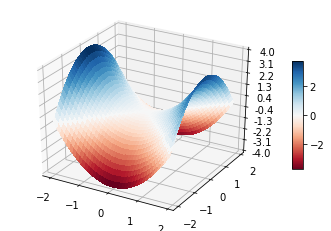

In [ ]:
#Plot of the function f_B
x=np.arange(-2,2, 0.1)
y=np.arange(-2,2, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= fB(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

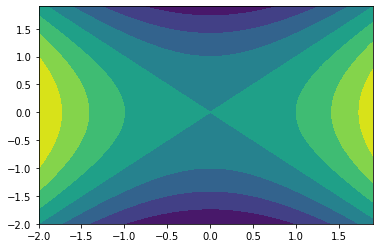

In [ ]:
#Plot of the level curves
x=np.arange(-2,2, 0.1)
y=np.arange(-2,2, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= fB(X,Y)

fig, ax = plt.subplots()
ax.contourf(X, Y, Z)

plt.show()

Here we just have gradient zero at the point (0,0), since $\nabla f_B(x,y)=(2x,-2y)$, This point is in fact a saddle point. The arguments to see this fact are the same as followed on the previous steps.
In fact, note that the Hessian is given by
\begin{pmatrix}
2 & 0 \\ 0 & -2
\end{pmatrix}
Note that this matrix is not definite positive nor negative definite. Therefore, the point is not a minimum nor a maximum. Geometrically its behaviour is described by the tangent line we are looking at, so it increases along the eigen direction (1,0) and decreases along the eigen direction (0,1). It is thus, what we call as saddle point. 

In [ ]:
np.linalg.eig(np.matrix([[2,0], [0,-2]]))

(array([ 2., -2.]), matrix([[1., 0.],
         [0., 1.]]))

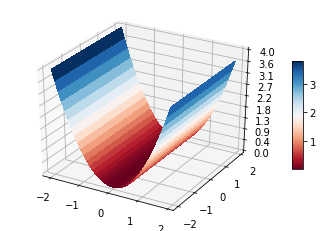

In [ ]:
#Plot of the function f_C
x=np.arange(-2,2, 0.1)
y=np.arange(-2,2, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= fC(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

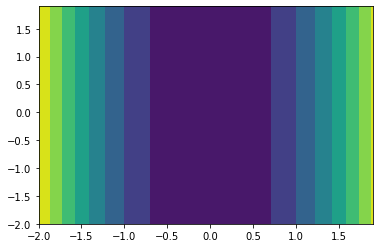

In [ ]:
#Plot of the level curves
x=np.arange(-2,2, 0.1)
y=np.arange(-2,2, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= fC(X,Y)

fig, ax = plt.subplots()
ax.contourf(X, Y, Z)

plt.show()

In this particular case, the line given by $x=0$ has all the set of points with gradient zero, since $\nabla f_C(x,y)=(2x,0)$ . They all are local minimums. The Hessian matrix is given by 
\begin{pmatrix}
2 & 0 \\ 0 & 0
\end{pmatrix}
which is positive semi-definite and therefore we have a minimum at each point of the line $x=0$ which is not unique.

####  2.2 A two dimensional function with multiple minima

#### 1.

Let's consider now the function:
$$
f(\mathbf{x}) = x_1^2(4-2.1x_1^2 + \frac{1}{3}x_1^4) + x_1 x_2 + x_2^2(-4 + 4x_2^2)
$$


In [ ]:
def f22(x,y):
    return x**2*(4-2.1*x**2 + (1/3)*x**4) + x*y + y**2*(-4+4*y**2)

We may plot the function within the range $x_1 \in [-2,2], x_2 \in [-1,1]$.

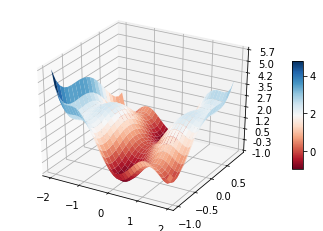

In [ ]:
#Plot of the function
x=np.arange(-2,2, 0.1)
y=np.arange(-1,1, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= f22(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

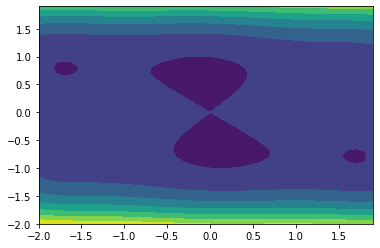

In [ ]:
#Plot of the level curves
x=np.arange(-2,2, 0.1)
y=np.arange(-2,2, 0.1)
X, Y = pylab.meshgrid(x,y)
Z= f22(X,Y)

fig, ax = plt.subplots()
ax.contourf(X, Y, Z)

plt.show()

There are  multiple local minimums and maximums!

#### 2.

In order to study them with more detail, let's analitically compute the gradient, which is given by:
$$
\nabla f (x,y)= \Big( 2x(4-4.2x^2 + x^4)+ y,x - 8y+16y^3 \Big)
$$

In [ ]:
#The gradient of the function
def grad22(x,y):
    return np.array([[2*x*(4-2.1*x**2 + (1/3)*x**4) + x**2*(-2*2.1*x + (4/3)*x**3)+y,
                     x+2*y*(-4+4*y**2) + 8*y**3]])

#### 3.

We seek to find numerically an approximation of the points $x^*$ at which the gradient vanishes. Let's consider then the next algorithm:

In [ ]:
#Let us call M the matrix with the norm of the gradient
M=np.zeros((800,400))
x=-2
y=-1
for i in range(800):
    x=x+0.005
    y=-1
    for j in range(400):
        y=y+0.005
        M[i,j]=grad22(x,y)[0,0]**2+grad22(x,y)[0,1]**2
#Find those with the norm is strictly smaller than the value of its 8 neighbors, we ignore those who are in the border
gradient_smaller=np.zeros(800*400)
position_array=np.zeros(2*800*400)
k=0
s=0
for i in range(1,799):
    for j in range(1,399):
        if(M[i,j]<M[i-1,j-1] and M[i,j]<M[i-1,j] and M[i,j]<M[i-1,j+1] and M[i,j]<M[i,j-1] and M[i,j]<M[i,j+1] and M[i,j]<M[i+1,j-1] and M[i,j]<M[i+1,j] and M[i,j]<M[i+1,j+1]):
            #if the number is strictly smaller than the value of its 8 neighbors, we saved (i,j) and its value
            gradient_smaller[k]=M[i,j]
            position_array[s]=i
            position_array[s+1]=j
            k=k+1
            s=s+2
#Let us remove the zeros that are not useful in the arrays, to do that let us see since which point there are zeros
for i in range(0,800*400):
  if(gradient_smaller[i]==0):
      dim=i
      break
new_gradient_smaller=np.zeros(dim)
new_position_array=np.zeros(2*dim)
j=0
for i in range(0,dim):
  new_gradient_smaller[i]=gradient_smaller[i]
  new_position_array[j]=position_array[j]
  new_position_array[j+1]=position_array[j+1]
  j=j+2

print(new_gradient_smaller)
print(new_position_array)
#Now we know, the value of the gradient where is a minimum in the grid and also the (x,y) since we have (i,j).
#In order to find (x,y), compute x=-2+0.005*i and y=-1+0.005*j and we have the point we want to find.

[1.43016790e-03 6.74582531e-04 4.15653494e-04 4.54050363e-05
 2.41818116e-04 1.25592847e-03 1.47687147e-03 2.73487078e-26
 1.47687147e-03 1.25592847e-03 2.41818116e-04 4.54050363e-05
 4.15653494e-04 6.74582531e-04 1.43016790e-03]
[ 58. 358.  71. 153.  78.  85. 140.  78. 153. 167. 177. 353. 381. 342.
 399. 199. 417.  56. 621.  45. 645. 231. 658. 320. 720. 313. 727. 245.
 740.  40.]


We have obtained 15 values. These points are $(x,y)=(-2+0.005*i,-1+0.005*j)$ where $(i,j)$ are in the second array. The first array gives us  their value of $||\nabla f(x,y)||^2$. For example, the first point that appears in our list is $(x,y)=(-2+0.005*58,-1+0.005*358)=(-1.71,0.79)$ and the value of $||\nabla f(x,y)||^2$ is $1.43\cdot 10^{-3}$.

In [ ]:
len_array = int(len(new_position_array)/2)

real_position =np.zeros(( len_array , 2))
j =0
for i in range(0, len_array):
    real_position[j,0]= -2 + 0.005 *new_position_array[2*i]
    real_position[j, 1]= -1 + 0.005*new_position_array[2*i+1]
    j+=1
print(real_position)
print(new_gradient_smaller)

[[-1.71   0.79 ]
 [-1.645 -0.235]
 [-1.61  -0.575]
 [-1.3   -0.61 ]
 [-1.235 -0.165]
 [-1.115  0.765]
 [-0.095  0.71 ]
 [-0.005 -0.005]
 [ 0.085 -0.72 ]
 [ 1.105 -0.775]
 [ 1.225  0.155]
 [ 1.29   0.6  ]
 [ 1.6    0.565]
 [ 1.635  0.225]
 [ 1.7   -0.8  ]]
[1.43016790e-03 6.74582531e-04 4.15653494e-04 4.54050363e-05
 2.41818116e-04 1.25592847e-03 1.47687147e-03 2.73487078e-26
 1.47687147e-03 1.25592847e-03 2.41818116e-04 4.54050363e-05
 4.15653494e-04 6.74582531e-04 1.43016790e-03]


#### 4.


Let us compute the Hessian matrix of the function $f22$ defined before. The matrix is given by

\begin{pmatrix}
2(4-12.6x^2+5x^4) & 1 \\ 1 & 8 (-1 + 6y^2)
\end{pmatrix}

We are going to compute the eigenvalues of the matrix evaluated at the points we found before. For that, let us create two function that evaluates the diagonal of the matrix at the point we want.

In [ ]:
def second_dif_x(x):
  #it only depends at the first coordinate of the point (x,y)
  return 2*(4-2.1*x**2+(1/3)*x**4) + 4*x*(-2*2.1*x+(4/3)*x**3) + (x**2)*(-2*2.1+4*x**2)
def second_dif_y(y):
  # it only depends at the second coordinate of the point (x,y)
  return 2*(-4+4*y**2)+40*y**2

In [ ]:
#Let us compute the eigenvalues of the Hessian matrix evaluated in the points we found before
for i in range(0,2*dim,2):
#for i in range(0, len_array):
    x=-2+0.005*new_position_array[i]
    y=-1+0.005*new_position_array[i+1]
    print('Point:', (x,y))
    x=second_dif_x(x)
    y=second_dif_y(y)
    print("Eigenvalues:", np.linalg.eig(np.matrix([[x,1], [1,y]]))[0])

Point: (-1.71, 0.79)
Eigenvalues: [19.42180933 22.35127877]
Point: (-1.645, -0.235)
Eigenvalues: [13.08812082 -5.40343782]
Point: (-1.6099999999999999, -0.575)
Eigenvalues: [10.28327821  7.45562589]
Point: (-1.2999999999999998, -0.61)
Eigenvalues: [-6.08969398  9.92349398]
Point: (-1.2349999999999999, -0.16500000000000004)
Eigenvalues: [-7.96120032 -5.90455667]
Point: (-1.115, 0.7650000000000001)
Eigenvalues: [-7.90890066 20.12651467]
Point: (-0.09499999999999997, 0.71)
Eigenvalues: [ 7.65629541 16.3138891 ]
Point: (-0.004999999999999893, -0.0050000000000000044)
Eigenvalues: [ 8.06163482 -8.06106481]
Point: (0.08499999999999996, -0.72)
Eigenvalues: [ 7.70944538 16.99220662]
Point: (1.105, -0.775)
Eigenvalues: [-7.89562162 20.86481213]
Point: (1.225, 0.15500000000000003)
Eigenvalues: [-8.09691957 -6.04687652]
Point: (1.29, 0.6000000000000001)
Eigenvalues: [-6.30718716  9.34415526]
Point: (1.6, 0.565)
Eigenvalues: [9.48622914 6.86057086]
Point: (1.6350000000000002, 0.2250000000000001)
Ei

As you can see, there are maximum, mimumum and saddle points. For example, the point $(-1.235,-0.165)$ is a maximum since its eigenvalues are both negatives. The point $(1.29,0.6)$ is a saddle point, since it has an eigenvalue poisitive and othe negative and finally the point $(1.7,-0.8)$ is a minimum since it has both eigenvalues positives. 

More explicitly:

$$
\begin{aligned}
& \text {Table 1.1. Explicit results }\\
&\begin{array}{cccc}
\hline \hline \text{Position} & \text{ Gradient value} & \text{Eigenvalues of } H_f(x,y) & \text{ Extreme point local behaviour}\\
    \hline
    (-1.71, 0.79) & 1.43016790e-03 & 19.42180933, 22.35127877 & Minimum \\
    (-1.645, -0.235) & 6.74582531e-04 & 13.08812082, -5.40343782 & Saddle \\
    (-1.61, -0.575) & 4.15653494e-04  & 10.28327821,  7.45562589 & Minimum \\
    (-1.3,   -0.61) & 4.54050363e-05 & -6.08969398,  9.92349398 & Saddle  \\
    (-1.235, -0.165) & 2.41818116e-04 & -7.96120032, -5.90455667 & Maximum \\
    (-1.115,  0.765) & 1.25592847e-03 & -7.90890066, 20.12651467 & Saddle \\
    (-0.095,  0.71 ) & 1.47687147e-03 & 7.65629541, 16.3138891 & Minimum \\
    (-0.005, -0.005) & 2.73487078e-26 & 8.06163482, -8.06106481 & Saddle  \\
    (0.085, -0.72) &
 1.47687147e-03 & 7.70944538, 16.99220662 & Minimum \\
 (1.105, -0.775) & 1.25592847e-03 & -7.89562162, 20.86481213 & Saddle  \\
 (1.225,  0.155) & 2.41818116e-04 &-8.09691957, -6.04687652 & Maximum \\
 (1.29,   0.6 )& 4.54050363e-05 & -6.30718716,  9.34415526 & Saddle  \\
  (1.6,   0.565) &
 4.15653494e-04 & 9.48622914, 6.86057086 & Minimum \\
 (1.635,  0.225) & 6.74582531e-04 & 12.15247454, -5.62642553 & Saddle  \\
 (1.7,   -0.8) & 1.43016790e-03 & 18.45834915, 22.95465085 & Minimum
\end{array}
\end{aligned}
$$